In [2]:
import pandas as pd
import numpy as np

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

dataset = pd.read_csv('car_evaluation.csv', names=col_names)
X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values
dataset.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
feature_names = list(dataset.columns.values[:-1])
for feature in feature_names:
    unique_count = dataset[feature].nunique()
    unique_vals = dataset[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [4]:
label_name = dataset.columns.values[-1]
print("{}: {} values, {}".format(label_name, dataset[label_name].nunique(), dataset[label_name].unique()))
dataset[label_name].value_counts()


class: 4 values, ['unacc' 'acc' 'vgood' 'good']


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [5]:
data_encoded = pd.get_dummies(dataset, columns=feature_names, drop_first=True)
data_encoded.tail()


,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,good,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,vgood,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,unacc,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,good,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,vgood,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [6]:
data_encoded['class'], class_uniques = pd.factorize(data_encoded['class'])
data_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,3,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [7]:
# Save the class column as a Pandas Series.
class_col = data_encoded['class']
# Remove class column from DataFrame.
data_encoded.drop(columns=['class'], inplace=True)
# Get the position of where the last column will be inserted.
last_col_pos = data_encoded.columns.get_loc('safety_med') + 1
# Insert the class column back into the DataFrame.
data_encoded.insert(last_col_pos, 'class', class_col)
data_encoded.tail()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,3
1724,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,2
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1726,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,3
1727,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,2


In [8]:
from sklearn.model_selection import train_test_split
# Features.
X = data_encoded.loc[:, 'buying_low':'safety_med']
# Labels.
y = data_encoded.loc[:, 'class']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)



In [9]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X, y)
clf.predict(X_test)
clf.score(X, y)


0.8478009259259259

>10 0.766 (0.063)
>50 0.834 (0.026)
>100 0.832 (0.029)
>500 0.823 (0.034)
>1000 0.814 (0.034)
>5000 0.800 (0.035)


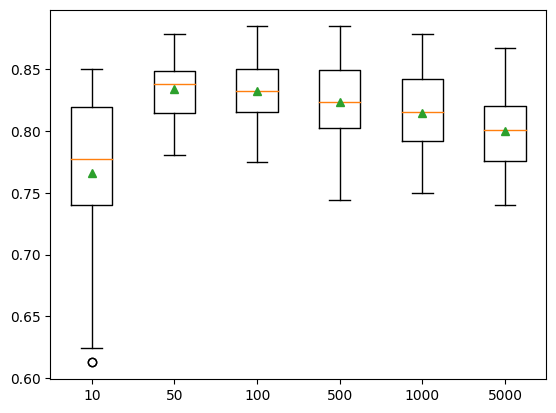

In [10]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()